In [59]:
import pandas as pd
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats import weightstats
import scipy.stats as stats

# Importing Dataset

In [9]:
mv=pd.read_csv('C:\\Users\\Durgesh\\Documents\\Absenteeism_data.csv')

In [106]:
mv.head()

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,11,26,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,36,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,3,23,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,7,7,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,11,23,23/07/2015,289,36,33,239.554,30,1,2,1,2


Feature Description


    > ID : Individual identification
    > Reason of absence : Reasons 1-21 are registered in the International Classification Diseases(ICD)
        1.Certain infectious or parasitic diseases
        2.Neoplasms
        3.Diseases of the blood or blood-forming organs and certain disorders involving the immune mechanism
        4.Endocrine, nutritional or metabolic diseases
        5.Mental, behavioural or neurodevelopmental disorders
        6.Diseases of the nervous system
        7.Diseases of the visual system
        8.Diseases of the ear or mastoid process
        9.Diseases of the circulatory system
        10.Diseases of the respiratory system
        11.Diseases of the digestive system
        12.Diseases of the skin
        13.Diseases of the musculoskeletal system or connective tissue
        14.Diseases of the genitourinary system
        15.Pregnancy, childbirth or the puerperium
        16.Certain conditions originating in the perinatal period
        17.Congenital malformations, deformations, and chromosomal abnormalities
        18.Symptoms, signs or clinical findings, not elsewhere classified
        19.Injury, poisoning or certain other consequences of external causes
        20.External causes of morbidity or mortality
        21.Factors influencing health status or contact with health services
        22.Patient follow-up
        23.Medical consultation
        24.Blood donation
        25.Laboratory examination
        26.Unjustified absence
        27.Physiotherapy
        28.Dental Consultation
    > Date : Date of Absence
    > Transportation Expense : Cost related to business travel (fuel, parking, meals, etc)
    > Distance to work : Distance measured in km
    > Age : Years of age
    > Daily workload average : Measured in minutes
    > Body Mass Index : Number based on your weight and height
    > Education : Representing different levels of education
        1.High School
        2.Graduate
        3.Post Graduate
        4.Master / Doctor
    > Childern : Number children in the family
    > Pets : Number of pets in family
    > Absenteeism time in hours : Target


In [15]:
df=mv.copy()

In [16]:
df.head()

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,11,26,7/7/2015,289,36,33,239.554,30,1,2,1,4
1,36,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,3,23,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,7,7,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,11,23,23/07/2015,289,36,33,239.554,30,1,2,1,2


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         700 non-null    int64  
 1   Reason for Absence         700 non-null    int64  
 2   Date                       700 non-null    object 
 3   Transportation Expense     700 non-null    int64  
 4   Distance to Work           700 non-null    int64  
 5   Age                        700 non-null    int64  
 6   Daily Work Load Average    700 non-null    float64
 7   Body Mass Index            700 non-null    int64  
 8   Education                  700 non-null    int64  
 9   Children                   700 non-null    int64  
 10  Pets                       700 non-null    int64  
 11  Absenteeism Time in Hours  700 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 65.8+ KB


## Data visualization

#### checking whether the features are normally distributed or not?

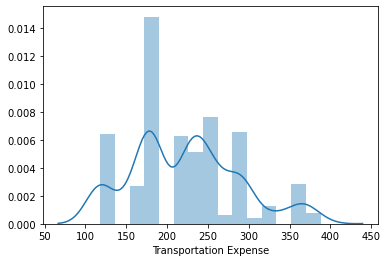

In [11]:
sns.distplot(mv['Transportation Expense'])

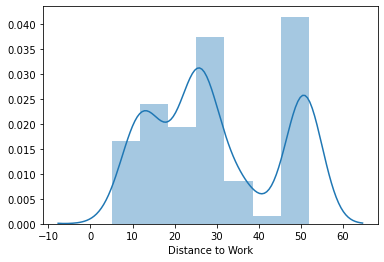

In [12]:
sns.distplot(mv['Distance to Work'])

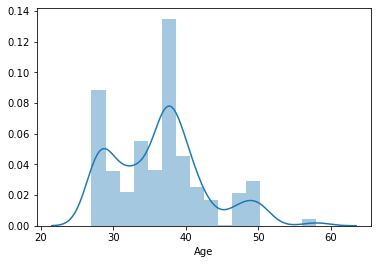

In [13]:
sns.distplot(mv['Age'])

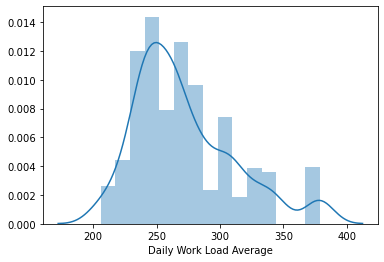

In [18]:
sns.distplot(mv['Daily Work Load Average'])

In [110]:
num_list = list(df.drop(columns=["Education","Reason for Absence"]).select_dtypes(exclude=object).columns)
num_list

['ID',
 'Transportation Expense',
 'Distance to Work',
 'Age',
 'Daily Work Load Average',
 'Body Mass Index',
 'Children',
 'Pets',
 'Absenteeism Time in Hours']

#### Outlier Analysis

In [19]:
cname=["Absenteeism Time in Hours","Transportation Expense","Distance to Work","Daily Work Load Average","Age"]

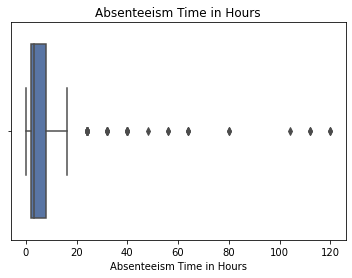

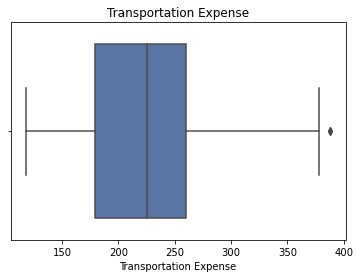

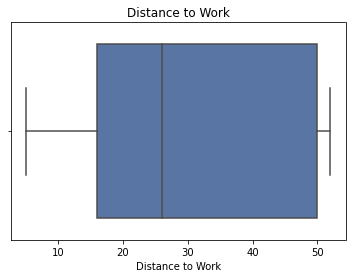

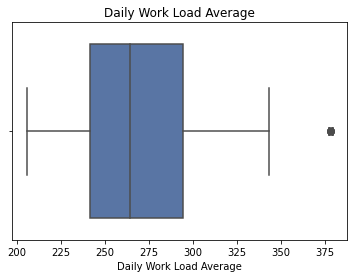

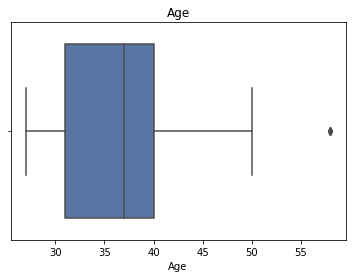

In [23]:
for i in cname:
    plt.figure()
    plt.clf() #clearing the figure
    sns.boxplot(df[i],palette="deep")
    plt.title(i)
    plt.show()

### Capping outliers

In [61]:
for i in cname:
    print(i)
    q75, q25 = np.percentile(df.loc[:,i], [75,25])
    iqr = q75 - q25
    minn = q25 - (iqr*1.5)
    maxx = q75 + (iqr*1.5)

    df.loc[df[i] < minn,i] = minn
    df.loc[df[i] > maxx,i] = maxx

Absenteeism Time in Hours
Transportation Expense
Distance to Work
Daily Work Load Average
Age


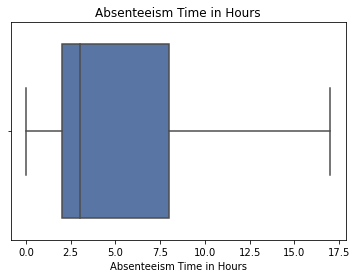

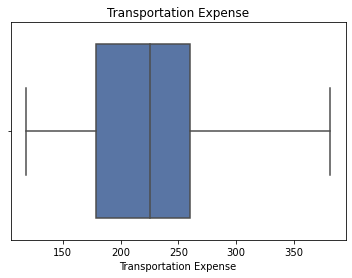

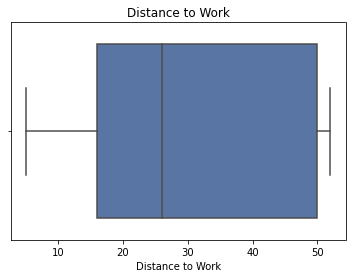

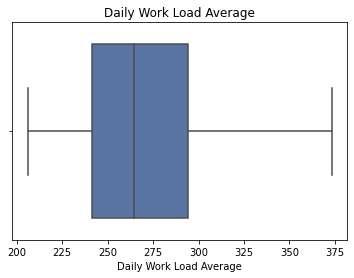

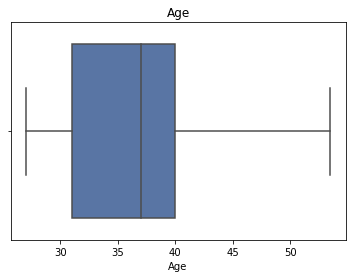

In [71]:
for i in cname:
    plt.figure()
    plt.clf() #clearing the figure
    sns.boxplot(df[i],palette="deep")
    plt.title(i)
    plt.show()

### One Sample T-test

##### Test 1 :If employees daily workload is 270 hours per year will it lead to absenteeism?

Hypothesis :
- H0: Mean of Daily Work Load Average equals 270
- H1: Mean of Distance to work not equal to 270

This test is consider with confidence level of 95%

In [70]:
score,value=stats.ttest_1samp(df['Daily Work Load Average'],270)
value

0.29001207046068256

Conclusion : 
- As our p-value is greater than 0.05 so we fail to reject hypothesis

#### Dropping column ID

In [112]:
df=df.drop(['ID'],axis=1)

Column 'ID' is deleted from table as it does not contribute more

In [113]:
df

,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,26,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,23,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,7,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,23,23/07/2015,289,36,33,239.554,30,1,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...
695,10,23/05/2018,179,22,40,237.656,22,2,2,0,8
696,6,23/05/2018,225,26,28,237.656,24,1,1,2,3
697,10,24/05/2018,330,16,28,237.656,25,2,0,0,8
698,23,24/05/2018,235,16,32,237.656,25,3,0,0,2


In [114]:
sorted(df['Reason for Absence'].unique())

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28]

# Categorization

Converting 'Reason for Absence' values in dummy variable to gain accuracy in model

To make data more easy to analyze, we will categorize the reason.

   - 1-14: All about diseases
   - 15-17: All about pregnancy & childbirth
   - 18-21: All about poison illness
   - 22-28: All about light reasons

In [115]:
reason_column=pd.get_dummies(df['Reason for Absence'])

In [116]:
reason_column

,0,1,2,3,4,5,6,7,8,9,...,18,19,21,22,23,24,25,26,27,28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
696,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
697,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
698,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [117]:
reason_column['check']=reason_column.sum(axis=1)

In [118]:
reason_column

,0,1,2,3,4,5,6,7,8,9,...,19,21,22,23,24,25,26,27,28,check
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
696,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
697,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
698,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [119]:
reason_column['check'].sum(axis=0)

700

In [120]:
reason_column['check'].unique()

array([1], dtype=int64)

In [121]:
reason_column=reason_column.drop(['check'],axis=1)

In [122]:
reason_column

,0,1,2,3,4,5,6,7,8,9,...,18,19,21,22,23,24,25,26,27,28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
696,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
697,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
698,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [123]:
reason_column=pd.get_dummies(df['Reason for Absence'],drop_first=True)
reason_column

,1,2,3,4,5,6,7,8,9,10,...,18,19,21,22,23,24,25,26,27,28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
696,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
697,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
698,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [124]:
df=df.drop(['Reason for Absence'],axis=1)

Drop 'Reason for absence' column to avoid multi collinearity with Reason A, B, C and D

In [125]:
df['Reason 1']=reason_column.loc[:,1:14].max(axis=1)

In [126]:
df

,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Reason 1
0,07/07/2015,289,36,33,239.554,30,1,2,1,4,0
1,14/07/2015,118,13,50,239.554,31,1,1,0,0,0
2,15/07/2015,179,51,38,239.554,31,1,0,0,2,0
3,16/07/2015,279,5,39,239.554,24,1,2,0,4,1
4,23/07/2015,289,36,33,239.554,30,1,2,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...
695,23/05/2018,179,22,40,237.656,22,2,2,0,8,1
696,23/05/2018,225,26,28,237.656,24,1,1,2,3,1
697,24/05/2018,330,16,28,237.656,25,2,0,0,8,1
698,24/05/2018,235,16,32,237.656,25,3,0,0,2,0


In [127]:

df['Reason 3']=reason_column.loc[:,18:21].max(axis=1)


In [128]:
df

,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Reason 1,Reason 3
0,07/07/2015,289,36,33,239.554,30,1,2,1,4,0,0
1,14/07/2015,118,13,50,239.554,31,1,1,0,0,0,0
2,15/07/2015,179,51,38,239.554,31,1,0,0,2,0,0
3,16/07/2015,279,5,39,239.554,24,1,2,0,4,1,0
4,23/07/2015,289,36,33,239.554,30,1,2,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
695,23/05/2018,179,22,40,237.656,22,2,2,0,8,1,0
696,23/05/2018,225,26,28,237.656,24,1,1,2,3,1,0
697,24/05/2018,330,16,28,237.656,25,2,0,0,8,1,0
698,24/05/2018,235,16,32,237.656,25,3,0,0,2,0,0


In [129]:
df['Reason 2']=reason_column.loc[:,15:17].max(axis=1)
df['Reason 4']=reason_column.loc[:,22:].max(axis=1)

In [130]:
df

,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Reason 1,Reason 3,Reason 2,Reason 4
0,07/07/2015,289,36,33,239.554,30,1,2,1,4,0,0,0,1
1,14/07/2015,118,13,50,239.554,31,1,1,0,0,0,0,0,0
2,15/07/2015,179,51,38,239.554,31,1,0,0,2,0,0,0,1
3,16/07/2015,279,5,39,239.554,24,1,2,0,4,1,0,0,0
4,23/07/2015,289,36,33,239.554,30,1,2,1,2,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,23/05/2018,179,22,40,237.656,22,2,2,0,8,1,0,0,0
696,23/05/2018,225,26,28,237.656,24,1,1,2,3,1,0,0,0
697,24/05/2018,330,16,28,237.656,25,2,0,0,8,1,0,0,0
698,24/05/2018,235,16,32,237.656,25,3,0,0,2,0,0,0,1


## Data Analytics

### Dashboard 1: Information about Employee

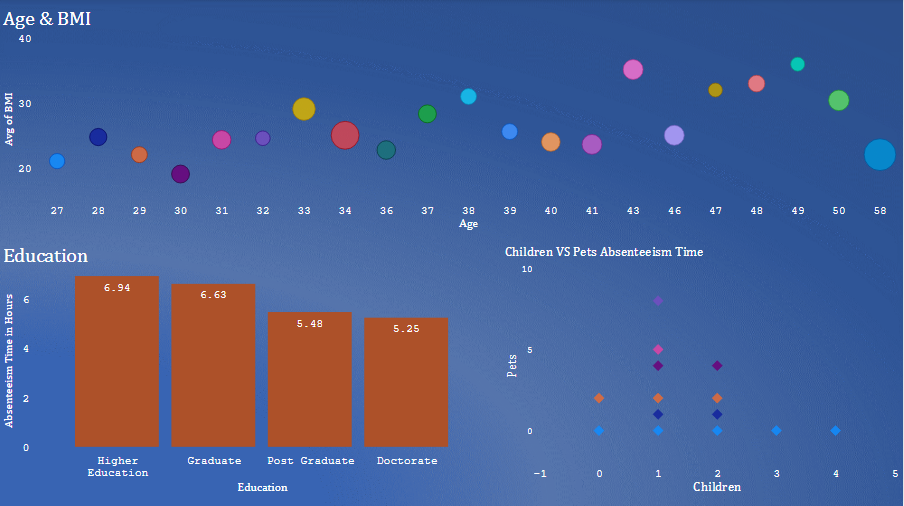

- BMI and Age dont have specific pattern with Abseenteism
- Employee with 2 Children and 1 or 2 pets have more abseenteism time then the others



### Dashboard 2:Daily Workload of Employee in Company

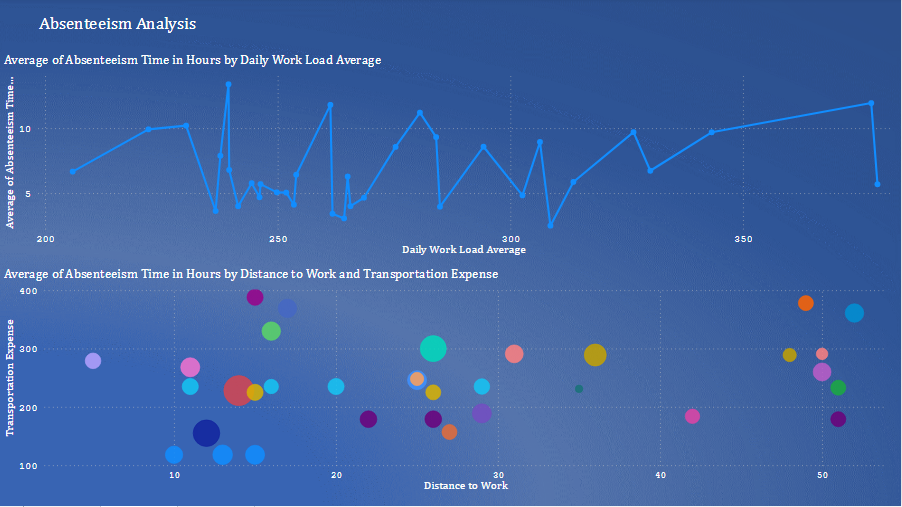

- Transportation expense dont have any specifict pattern with workload time but have effect to average abseenteism time
- Short distance (under 28) have more abseenteism time than long distance



### Dashboard 3: Absenteeism of Emplyee with respect to Month and Year

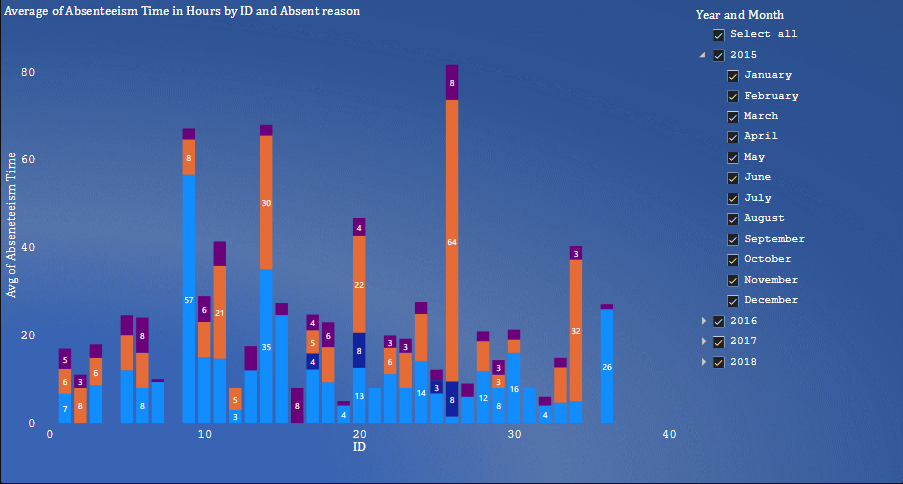

- Reason 1 has highest reason of Absenteeism
-  Employee with ID 26 has more Absenteeism time in all four year

In [131]:
df.columns.values

array(['Date', 'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets', 'Absenteeism Time in Hours', 'Reason 1',
       'Reason 3', 'Reason 2', 'Reason 4'], dtype=object)

In [132]:
columns_reordered=['Reason 1',
       'Reason 3', 'Reason 2', 'Reason 4','Date', 'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets', 'Absenteeism Time in Hours']

In [133]:
df=df[columns_reordered]

In [134]:
df.head()

,Reason 1,Reason 3,Reason 2,Reason 4,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,1,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,0,0,0,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,0,0,0,1,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,1,0,0,0,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,0,0,0,1,23/07/2015,289,36,33,239.554,30,1,2,1,2


In [135]:
df['Date']=pd.to_datetime(df['Date'],format='%d/%m/%Y') #%Y is capital

In [136]:
df['Date']

0     2015-07-07
1     2015-07-14
2     2015-07-15
3     2015-07-16
4     2015-07-23
         ...    
695   2018-05-23
696   2018-05-23
697   2018-05-24
698   2018-05-24
699   2018-05-31
Name: Date, Length: 700, dtype: datetime64[ns]

In [137]:
df['Date'][0].month

7

In [138]:
list_arr=[]

In [139]:
for i in range(df.shape[0]):
    list_arr.append(df['Date'][i].month)

In [140]:
df['Month']=list_arr

In [141]:
df

,Reason 1,Reason 3,Reason 2,Reason 4,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Month
0,0,0,0,1,2015-07-07,289,36,33,239.554,30,1,2,1,4,7
1,0,0,0,0,2015-07-14,118,13,50,239.554,31,1,1,0,0,7
2,0,0,0,1,2015-07-15,179,51,38,239.554,31,1,0,0,2,7
3,1,0,0,0,2015-07-16,279,5,39,239.554,24,1,2,0,4,7
4,0,0,0,1,2015-07-23,289,36,33,239.554,30,1,2,1,2,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,1,0,0,0,2018-05-23,179,22,40,237.656,22,2,2,0,8,5
696,1,0,0,0,2018-05-23,225,26,28,237.656,24,1,1,2,3,5
697,1,0,0,0,2018-05-24,330,16,28,237.656,25,2,0,0,8,5
698,0,0,0,1,2018-05-24,235,16,32,237.656,25,3,0,0,2,5


In [142]:
def date_to_weekdays(days):
    return days.weekday()

df['Day of the Week']=df['Date'].apply(date_to_weekdays)

df.head()

In [143]:
df['Education'].unique()

array([1, 3, 2, 4], dtype=int64)

In [144]:
df['Education'].value_counts()

1    583
3     73
2     40
4      4
Name: Education, dtype: int64

In [145]:
df['Education']=df['Education'].map({1:0,2:1,3:1,4:1})

In [146]:
df['Education'].value_counts()

0    583
1    117
Name: Education, dtype: int64

### Feature Engineering

In [147]:
df.head()

,Reason 1,Reason 3,Reason 2,Reason 4,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Month,Day of the Week
0,0,0,0,1,2015-07-07,289,36,33,239.554,30,0,2,1,4,7,1
1,0,0,0,0,2015-07-14,118,13,50,239.554,31,0,1,0,0,7,1
2,0,0,0,1,2015-07-15,179,51,38,239.554,31,0,0,0,2,7,2
3,1,0,0,0,2015-07-16,279,5,39,239.554,24,0,2,0,4,7,3
4,0,0,0,1,2015-07-23,289,36,33,239.554,30,0,2,1,2,7,3


In [148]:
df['Absenteeism Time in Hours'].median()

3.0

In [149]:
import numpy as np
targets=np.where(df['Absenteeism Time in Hours']>df['Absenteeism Time in Hours'].median(),1,0)

- Consider median for prediction of absenteeism ,
- if <3,assign 1 to column Excessive Absenteeism
- else assign 0 to column Excessive Absenteeism

In [150]:
df['Excessive Absenteeism']=targets

In [151]:
df.head()

,Reason 1,Reason 3,Reason 2,Reason 4,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Month,Day of the Week,Excessive Absenteeism
0,0,0,0,1,2015-07-07,289,36,33,239.554,30,0,2,1,4,7,1,1
1,0,0,0,0,2015-07-14,118,13,50,239.554,31,0,1,0,0,7,1,0
2,0,0,0,1,2015-07-15,179,51,38,239.554,31,0,0,0,2,7,2,0
3,1,0,0,0,2015-07-16,279,5,39,239.554,24,0,2,0,4,7,3,1
4,0,0,0,1,2015-07-23,289,36,33,239.554,30,0,2,1,2,7,3,0


In [152]:
df=df.drop(['Absenteeism Time in Hours'],axis=1)

In [153]:
df.head()

,Reason 1,Reason 3,Reason 2,Reason 4,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Month,Day of the Week,Excessive Absenteeism
0,0,0,0,1,2015-07-07,289,36,33,239.554,30,0,2,1,7,1,1
1,0,0,0,0,2015-07-14,118,13,50,239.554,31,0,1,0,7,1,0
2,0,0,0,1,2015-07-15,179,51,38,239.554,31,0,0,0,7,2,0
3,1,0,0,0,2015-07-16,279,5,39,239.554,24,0,2,0,7,3,1
4,0,0,0,1,2015-07-23,289,36,33,239.554,30,0,2,1,7,3,0


In [154]:
df.shape


(700, 16)

In [155]:
df=df.drop(['Date'],axis=1)

In [156]:
unscaled=df.iloc[:,:-1]

In [157]:
unscaled

,Reason 1,Reason 3,Reason 2,Reason 4,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Month,Day of the Week
0,0,0,0,1,289,36,33,239.554,30,0,2,1,7,1
1,0,0,0,0,118,13,50,239.554,31,0,1,0,7,1
2,0,0,0,1,179,51,38,239.554,31,0,0,0,7,2
3,1,0,0,0,279,5,39,239.554,24,0,2,0,7,3
4,0,0,0,1,289,36,33,239.554,30,0,2,1,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,1,0,0,0,179,22,40,237.656,22,1,2,0,5,2
696,1,0,0,0,225,26,28,237.656,24,0,1,2,5,2
697,1,0,0,0,330,16,28,237.656,25,1,0,0,5,3
698,0,0,0,1,235,16,32,237.656,25,1,0,0,5,3


### Omitting dummy variables

- If we used dummmy variable for interpretation ,then it will lose its interpretability , so we should not considered it for normalization or standardization

In [158]:


class CustomScaler(BaseEstimator,TransformerMixin): 
    
    # init or what information we need to declare a CustomScaler object
    # and what is calculated/declared as we do
    
    def __init__(self,columns,copy=True,with_mean=True,with_std=True):
        
        # scaler is nothing but a Standard Scaler object
        self.scaler = StandardScaler(copy,with_mean,with_std)
        # with some columns 'twist'
        self.columns = columns
        self.mean_ = None
        self.var_ = None
        
    
    # the fit method, which, again based on StandardScale
    
    def fit(self, X, y=None):
        self.scaler.fit(X[self.columns], y)
        self.mean_ = np.mean(X[self.columns])
        self.var_ = np.var(X[self.columns])
        return self
    
    # the transform method which does the actual scaling

    def transform(self, X, y=None, copy=None):
        
        # record the initial order of the columns
        init_col_order = X.columns
        
        # scale all features that you chose when creating the instance of the class
        X_scaled = pd.DataFrame(self.scaler.transform(X[self.columns]), columns=self.columns)
        
        # declare a variable containing all information that was not scaled
        X_not_scaled = X.loc[:,~X.columns.isin(self.columns)]
        
        # return a data frame which contains all scaled features and all 'not scaled' features
        # use the original order (that you recorded in the beginning)
        return pd.concat([X_not_scaled, X_scaled], axis=1)[init_col_order]

In [159]:
unscaled.columns.values

array(['Reason 1', 'Reason 3', 'Reason 2', 'Reason 4',
       'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets', 'Month', 'Day of the Week'], dtype=object)

In [160]:
columns_to_omit = ['Reason 1', 'Reason 3', 'Reason 2', 'Reason 4', 'Education']

In [161]:
# columns_to_scale = ['Transportation Expense', 'Distance to Work', 'Age',
#        'Daily Work Load Average', 'Body Mass Index', 'Education',
#        'Children', 'Pets', 'Month', 'Day of the Week']
columns_to_scale = [x for x in unscaled.columns.values if x not in columns_to_omit]

In [162]:
columns_to_scale

['Transportation Expense',
 'Distance to Work',
 'Age',
 'Daily Work Load Average',
 'Body Mass Index',
 'Children',
 'Pets',
 'Month',
 'Day of the Week']

In [163]:
absenteeism_scaler = CustomScaler(columns_to_scale)

C:\Users\Durgesh\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [164]:
absenteeism_scaler.fit(unscaled)

C:\Users\Durgesh\anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


CustomScaler(columns=['Transportation Expense', 'Distance to Work', 'Age',
                      'Daily Work Load Average', 'Body Mass Index', 'Children',
                      'Pets', 'Month', 'Day of the Week'],
             copy=None, with_mean=None, with_std=None)

In [165]:
scaled_input=absenteeism_scaler.transform(unscaled)

In [166]:
scaled_input

,Reason 1,Reason 3,Reason 2,Reason 4,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Month,Day of the Week
0,0,0,0,1,1.005844,0.412816,-0.536062,-0.806331,0.767431,0,0.880469,0.268487,0.182726,-0.683704
1,0,0,0,0,-1.574681,-1.141882,2.130803,-0.806331,1.002633,0,-0.019280,-0.589690,0.182726,-0.683704
2,0,0,0,1,-0.654143,1.426749,0.248310,-0.806331,1.002633,0,-0.919030,-0.589690,0.182726,-0.007725
3,1,0,0,0,0.854936,-1.682647,0.405184,-0.806331,-0.643782,0,0.880469,-0.589690,0.182726,0.668253
4,0,0,0,1,1.005844,0.412816,-0.536062,-0.806331,0.767431,0,0.880469,0.268487,0.182726,0.668253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,1,0,0,0,-0.654143,-0.533522,0.562059,-0.853789,-1.114186,1,0.880469,-0.589690,-0.388293,-0.007725
696,1,0,0,0,0.040034,-0.263140,-1.320435,-0.853789,-0.643782,0,-0.019280,1.126663,-0.388293,-0.007725
697,1,0,0,0,1.624567,-0.939096,-1.320435,-0.853789,-0.408580,1,-0.919030,-0.589690,-0.388293,0.668253
698,0,0,0,1,0.190942,-0.939096,-0.692937,-0.853789,-0.408580,1,-0.919030,-0.589690,-0.388293,0.668253


In [167]:
scaled_input.shape

(700, 14)

In [168]:
train_test_split(scaled_input,targets)

[     Reason 1  Reason 3  Reason 2  Reason 4  Transportation Expense  \
 91          0         1         0         0               -0.654143   
 671         0         1         0         0                0.040034   
 523         1         0         0         0                2.213108   
 510         1         0         0         0                1.005844   
 232         0         0         0         1                2.348925   
 ..        ...       ...       ...       ...                     ...   
 532         0         1         0         0               -0.654143   
 384         1         0         0         0               -0.986140   
 596         1         0         0         0                0.040034   
 249         0         1         0         0                1.005844   
 8           0         1         0         0               -1.016322   
 
      Distance to Work       Age  Daily Work Load Average  Body Mass Index  \
 91          -0.533522  0.562059                 0.86372

In [169]:
x_train,x_test,y_train,y_test=train_test_split(scaled_input,targets,test_size=0.2,random_state=20)

In [170]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(560, 14) (560,)
(140, 14) (140,)


# Logistic Regression with Sklearn

In [171]:
reg=LogisticRegression()

In [172]:
reg.fit(x_train,y_train)

LogisticRegression()

In [178]:
y_pred=reg.predict(x_train)

#### Accuracy

In [173]:
reg.score(x_train,y_train)

0.775

#### Confusion Matrix

[[249  58]
 [ 68 185]]


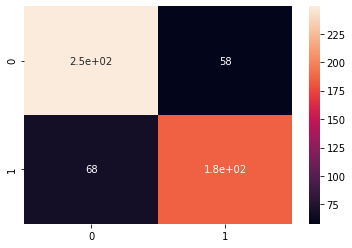

In [179]:
cm = confusion_matrix(y_train,y_pred)
print(cm)

sns.heatmap(cm, annot=True)
plt.show()

#### Classification Report

In [181]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80       307
           1       0.76      0.73      0.75       253

    accuracy                           0.78       560
   macro avg       0.77      0.77      0.77       560
weighted avg       0.77      0.78      0.77       560



## Coefficient and Intercept

- Getting the final logistic regression equation with the values of the coefficients

In [ ]:
print(reg.intercept_)

In [ ]:
print(reg.coef_)

In [ ]:
feature_name=unscaled.columns.values

In [ ]:
summary_index=pd.DataFrame(columns=['Feature name'],data=feature_name)
summary_index

In [ ]:
summary_index['Coefficient']=np.transpose(reg.coef_)


In [ ]:
summary_index

In [ ]:
summary_index.index=summary_index.index+1
summary_index.loc[0]=['Intercept',reg.intercept_[0]]
summary_index

In [ ]:
summary_index=summary_index.sort_index()

In [ ]:
summary_index

#### Odds ratio

In [ ]:
summary_index['Odds_ratio']=np.exp(summary_index.Coefficient)

In [ ]:
summary_index.sort_values('Odds_ratio',ascending=False)

A feature is not particularly important

  - its coefficient is around 0

Eg: Work load Average/day, Social Smoker and Hit target
shows that no matter the feature value, we will multiply it by 0 in the model

In [ ]:
df.to_csv('Documents/absenteeism_modified.csv')

## Conclusion

- Reason 1 and Reason 3 has more weightage .

Therefore , reason like poisoning ,injuries are most common for absenteeism

- Employee having children and pets also provides weightage for absenteeism
- Also,Transport is a reason for which employee remain absent for hours